# Problem 8.13

# All necessary imports

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Question 8.13(a)

In [2]:
x_coords_1 = [-0.494, -0.311, 0.0064, -0.0089, 0.0014, -0.189,0.085, 0.171, 0.142]
y_coords_1 = [0.363, -0.101, 0.374, -0.173, 0.138, 0.718, 0.32208, -0.302, 0.568]

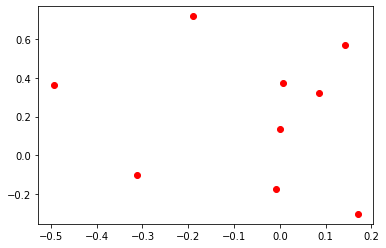

In [3]:
plt.scatter(x_coords_1,y_coords_1, color = 'red', marker = 'o')

In [4]:
x_coords_2 = [0.491, -0.892, -0.721, 0.519, -0.775, -0.646,-0.803, 0.994, 0.724, -0.748,-0.635]
y_coords_2= [0.920, -0.946, -0.710, -0.715, 0.551, 0.773, 0.875, 0.801, -0.795,-0.853, -0.905]

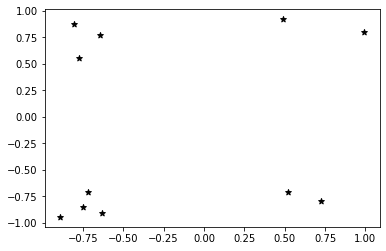

In [5]:
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')

In [6]:
all_datapoints = np.array([[1,-0.494,0.363, 1], [1,-0.311,-0.101,1], [1,0.0064,0.374,1], [1,-0.0089,-0.173,1],
                [1,0.0014,0.138,1], [1,-0.189,0.718,1], [1,0.085,0.32208,1], [1,0.171,-0.302,1],
                [1,0.142,0.568,1], [1,0.491,  0.920,-1], [1,-0.892, -0.946,-1], [1,-0.721, -0.710,-1],
                [1,0.519, -0.715,-1], [1,-0.775, 0.551,-1],[1,-0.646,0.773,-1], [1,-0.803, 0.875,-1],
                [1,0.994, 0.801,-1], [1,0.724,-0.795,-1],[1,-0.748,-0.853-1],[1,-0.635,-0.905,-1]])

# Combined plotting of all the datapoints for visualization purposes

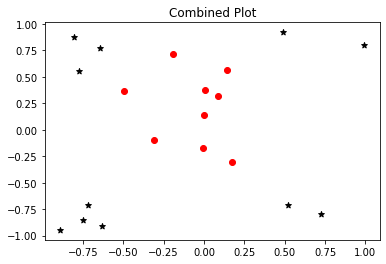

In [7]:
plt.title('Combined Plot')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.scatter(x_coords_1,y_coords_1, color = 'red', marker = 'o')

# Doing feature Transformation in X space

In [8]:
x_w1 = []
for i in range(len(all_datapoints)):
    x_w1.append(all_datapoints[i][0:3])
x_w1 = np.array(x_w1,dtype = float)
y_w1_l = [1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]

In [9]:
W_1 = inv(x_w1.T.dot(x_w1)).dot(x_w1.T).dot(y_w1_l)

In [10]:
N = 2000
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X_MESHGRID, Y_MESHGRID = np.meshgrid(x, y)

In [11]:
def feature_transform_2(datapoints):
    result = []
    for i in datapoints:
        x_1 = i[1]
        to_append = i[-1]
        x_2 = i[2]
        x = [1, x_1, x_2, x_1**2, x_1*x_2, x_2**2, to_append]
        result.append(x)
    result_array = np.array(result)
    return result_array

def contour_func_2(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x**2 + w[4]*(x*y) + w[5]*(y**2)

In [12]:
transformed = feature_transform_2(all_datapoints)
x_transformed = transformed[:,:-1]
y_transformed = transformed[:,-1]
W_2 = inv(x_transformed.T.dot(x_transformed)).dot(x_transformed.T).dot(y_transformed)

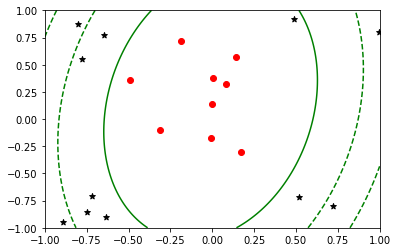

In [13]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_2(X_MESHGRID, Y_MESHGRID,W_2), 3, colors = 'g')

# Plotting just the main contour

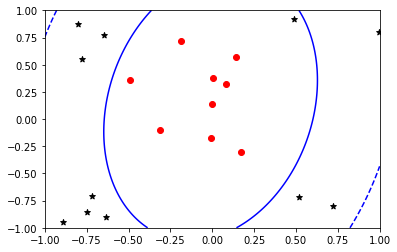

In [14]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_2(X_MESHGRID, Y_MESHGRID,W_2), 1, colors = 'b')

In [15]:
def feature_transformation_3(datapoints):
    result = []
    for i in datapoints:
        x_1 = i[1]
        to_append = i[-1]
        x_2 = i[2]
        x = [1, x_1, x_2, x_1 * x_2, x_1**2, x_2**2, x_1**3, (x_1**2)*x_2, x_1*(x_2**2), x_2**3, to_append]
        result.append(x)
    result_array = np.array(result)
    return result_array

def contour_func_3(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x*y + w[4]*(x**2) + w[5]*(y**2) + w[6]*(x**3) + w[7]*(x**2)*y + w[8]*x*(y**2) + w[9]*y**3

In [16]:
transformed = feature_transformation_3(all_datapoints)
x_transformed = transformed[:,:-1]
y_transformed = transformed[:,-1]

In [17]:
W_3 = inv(x_transformed.T.dot(x_transformed)).dot(x_transformed.T).dot(y_transformed)

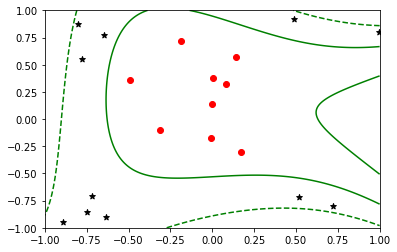

In [18]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_3(X_MESHGRID, Y_MESHGRID,W_3), 3, colors = 'g')

# Plotting just the main contour

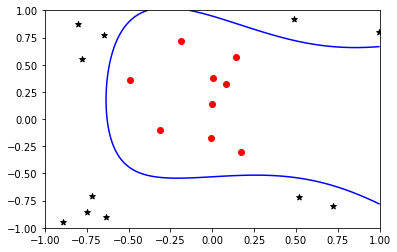

In [19]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_3(X_MESHGRID, Y_MESHGRID,W_3), 1, colors = 'b')

# Question 8.13(b)

Looking at the second and the third order transformations, the third order transformation seems to be overfitted.

# Question 8.13(c)

# Using Pseudo-Inverse Algorithm

# Second order feature transformation

In [20]:
def feature_transformation_pseudo_2(datapoints):
    result = []
    for i in datapoints:
        x_1 = i[1]
        to_append = i[-1]
        x_2 = i[2]
        x = [1, x_1, x_2, x_1**2, x_1*x_2, x_2**2, to_append]
        result.append(x)
    result_array = np.array(result)
    return result_array

def contour_func_pseudo_2(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x**2 + w[4]*(x*y) + w[5]*(y**2)

In [21]:
data_pseudo = feature_transformation_pseudo_2(all_datapoints)
x_transformed = data_pseudo[:,:-1]
y_transformed = data_pseudo[:,-1]

In [22]:
regularization_lambda = 1
W_P = inv(x_transformed.T.dot(x_transformed) + regularization_lambda*(x_transformed.T.dot(x_transformed))).dot(x_transformed.T).dot(y_transformed)

Text(0.5, 1.0, 'Fitting using Order-2')

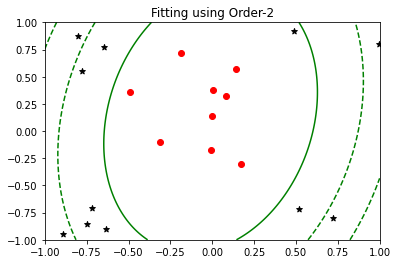

In [23]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_pseudo_2(X_MESHGRID, Y_MESHGRID,W_P), 3, colors = 'g')
plt.title('Fitting using Order-2')

# Plotting just the main contour

Text(0.5, 1.0, 'Fitting using Order-2')

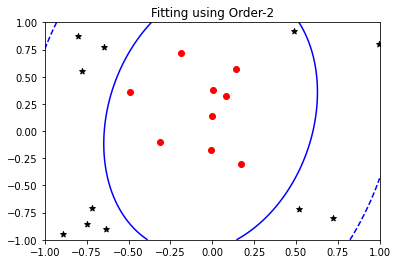

In [24]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(x_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_pseudo_2(X_MESHGRID, Y_MESHGRID,W_P), 1, colors = 'b')
plt.title('Fitting using Order-2')

# Third order feature transformation

In [25]:
def feature_transformation_pseudo_3(datapoints):
    result = []
    for i in datapoints:
        x_1 = i[1]
        to_append = i[-1]
        x_2 = i[2]
        x = [1, x_1, x_2, x_1 * x_2, x_1**2, x_2**2, x_1**3, (x_1**2)*x_2, x_1*(x_2**2), x_2**3, to_append]
        result.append(x)
    result_array = np.array(result)
    return result_array
def contour_func_pseudo_3(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x*y + w[4]*(x**2) + w[5]*(y**2) + w[6]*(x**3) + w[7]*(x**2)*y + w[8]*x*(y**2) + w[9]*y**3

In [26]:
data_pseudo = feature_transformation_pseudo_3(all_datapoints)
x_transformed = data_pseudo[:,:-1]
y_transformed = data_pseudo[:,-1]

In [27]:
regularization_lambda = 1
W_P = inv(x_transformed.T.dot(x_transformed) + regularization_lambda*(x_transformed.T.dot(x_transformed))).dot(x_transformed.T).dot(y_transformed)

Text(0.5, 1.0, 'Fitting using Order-3')

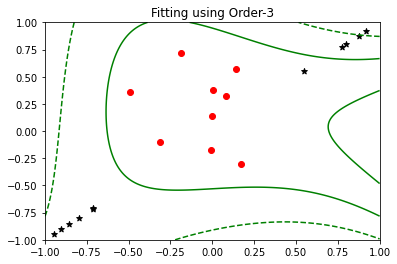

In [28]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(y_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_pseudo_3(X_MESHGRID, Y_MESHGRID,W_P), 3, colors = 'g')
plt.title('Fitting using Order-3')

# Plotting just the main contour


Text(0.5, 1.0, 'Fitting using Order-3')

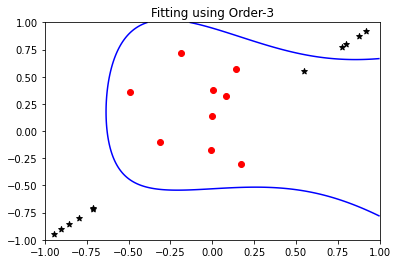

In [29]:
plt.scatter(x_coords_1,y_coords_1, color = 'r', marker = 'o')
plt.scatter(y_coords_2,y_coords_2,color='k', marker = '*')
plt.contour(X_MESHGRID, Y_MESHGRID, contour_func_pseudo_3(X_MESHGRID, Y_MESHGRID,W_P), 1, colors = 'b')
plt.title('Fitting using Order-3')